PUNTO 1:

In [1]:
"""
Sea f(x)=(1+x)²ln(1+x)
.

- Determine el segundo polinomio de Taylor P2(x) para la función f(x) en torno a x0=0.
- Use P2(0.5) para aproximar f(0.5) Determine una cota superior para el error |f(0.5)−P2(0.5)| por medio de la fórmula de error y compárela con el error real.
- Aproxime ∫0.5−0.5f(x)dx usando ∫0.5−0.5P3(x)dx
"""
from math import factorial
import sympy as sp

#1. Determine el segundo polinomio de Taylor P2(x) para la función f(x) en torno a x0=0.
def serie_taylor(funcion, x0,grado_polinomio):
    # f: función
    # x0: punto alrededor donde se construye la serie
    # n: Grado del polinomio

    polinomio = 0
    for k in range(grado_polinomio + 1):
        derivada_funcion = sp.diff(funcion,x,k)
        derivada_funcion_evaluada = derivada_funcion.evalf(subs={x:x0})
        polinomio+= derivada_funcion_evaluada * (x-x0)**k/factorial(k)

    return sp.expand(polinomio)

x = sp.symbols('x')
x0= 0
funcion = ((1+x)**2) * sp.ln(1+x)

funcion_evaluada_en_0 = funcion.evalf(subs={x:x0})
polinomio_grado_2 = serie_taylor(funcion,x0,2)



# #2. Use P3(0.5) para aproximar f(0.5) Determine una cota superior para el error |f(0.5)−P2(0.5)| por medio de la fórmula de error y compárela con el error real.

polinomio_evualado_en_05 = polinomio_grado_2.evalf(subs={x:0.5})
funcion_evaluada_en_05 = funcion.evalf(subs={x:0.5})

error_absoluto = abs(funcion_evaluada_en_05-polinomio_evualado_en_05)

error_relativo = error_absoluto/funcion_evaluada_en_05

print(f"El polinomio de grado 2 es: {polinomio_grado_2}")
print(f"EL valor de la funcion evaluada en 0.5 es: {funcion_evaluada_en_05}")
print(f"El valor del polinomio evaluado en 0.5 es: {polinomio_evualado_en_05}")
print(f"El error absoluto es: {error_absoluto}")
print(f"El error relativo es: {error_relativo}")


# #3. Aproxime ∫0.5−0.5f(x)dx usando ∫0.5−0.5P3(x)dx
polinomio_grado_3 = serie_taylor(funcion,x0,3)
integral_aproximada = sp.integrate(polinomio_grado_3, (x, -0.5, 0.5))
integral_real = sp.integrate(funcion, (x, -0.5, 0.5))
print(f"Integral aproximada de f(x) en [-0.5, 0.5] usando P3(x): {integral_aproximada}")
print(f"Integral real de f(x) en [-0.5, 0.5]: {integral_real}")



El polinomio de grado 2 es: 1.5*x**2 + 1.0*x
EL valor de la funcion evaluada en 0.5 es: 0.912296493243370
El valor del polinomio evaluado en 0.5 es: 0.875000000000000
El error absoluto es: 0.0372964932433698
El error relativo es: 0.0408819868536099
Integral aproximada de f(x) en [-0.5, 0.5] usando P3(x): 0.125000000000000
Integral real de f(x) en [-0.5, 0.5]: 0.123918268033905


PUNTO 3

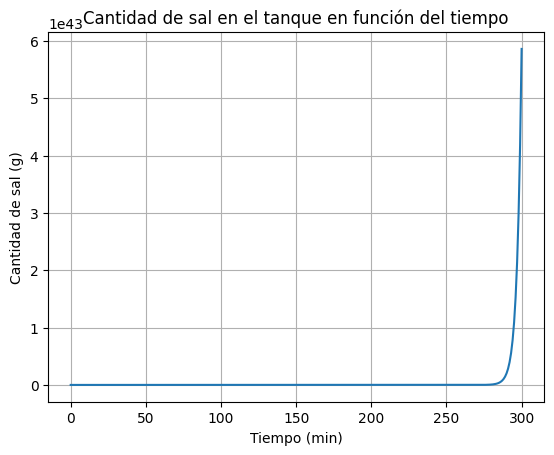

In [2]:
"""
Un tanque contiene 200 L de un líquido en el cual se disuelven 30 g de sal. Una salmuera que contiene 1g de sal por litro se bombea al tanque a razón de 4L/min; la solución, adecuadamente mezclada, se bombea hacia afuera con la misma rapidez.

dQdt+QVr2=Q1r1


donde Q, es la cantidad de sal en el tanque, r1,r2
, son las velocidades y (Q1
 es la concentración de entrada.

1. Encuentre el número de gramos de sal que hay en el tanque al cabo de 30 minutos.
2. Realice una gráfica de la cantidad de sal en cualquier instante t. (recomendación realice en un periodo de tiempo de [0, 1h])
"""
import matplotlib.pyplot as plt

# Parámetros
V = 200  
h=0.1
r1 = 4   
r2 = 4   
Q = 30
t0= 0
tf= 30

concentraciones = [1]
while (t0 < tf):
    t0+=h
    concentraciones.append(h*((concentraciones[-1]*r1) - ((Q/V)*r2))+concentraciones[-1])


plt.plot(concentraciones)
plt.xlabel('Tiempo (min)')
plt.ylabel('Cantidad de sal (g)')
plt.title('Cantidad de sal en el tanque en función del tiempo')
plt.grid(True)
plt.show()